# Theft Data from BikeMaps.Org, Victoria BC

## Importing Libraries and Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import numpy as np
import pysal
import pysal.spatial_dynamics.interaction as interaction
np.random.seed(100)
import datetime


from IPython.display import IFrame, Image, HTML, display, YouTubeVideo
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns  # Makes for nicer plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4
from matplotlib.patches import Ellipse, Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import interact, interactive, fixed

import scipy
import treelib
import pyclust
from scipy.spatial.distance import squareform, pdist
import sklearn
from sklearn import preprocessing


from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
theft = pd.read_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/theft.csv')

In [4]:
theft.dtypes

i_type                  object
date                    object
p_type                  object
details                 object
how_locked              object
lock                    object
locked_to               object
lighting               float64
traffic                 object
police_report           object
police_report_num       object
insurance_claim         object
insurance_claim_num    float64
regular_cyclist         object
pk                       int64
longitude              float64
latitude               float64
dtype: object

In [9]:
theft.head()

theft.shape

(69, 17)

## Cluster Analysis- only taking into account space, not time

In [10]:
theft_locations = theft[['longitude', 'latitude']]

In [17]:
theft_m = theft_locations.as_matrix()


theft_distances = pdist(theft_m, 'euclidean')

In [18]:
theft_distances = theft_distances[theft_distances != 0]

np.mean(np.ravel(theft_distances))

0.03516964134517666

## BDSCAN Clustering Algorithm

In [32]:
cluster = sklearn.cluster.DBSCAN(eps = 0.03 , min_samples = 6).fit(theft_m) #change that number 

labels = cluster.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)



#db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(cluster.labels_, dtype=bool)
core_samples_mask[cluster.core_sample_indices_] = True


#print('Estimated number of clusters: %d' % n_clusters_)

#print(labels)

print(n_clusters_)

#print('Estimated number of clusters: %d' % n_clusters_)

#print("Silhouette Coefficient: %0.3f"
     # % metrics.silhouette_score(theft_m, labels))


print(labels)

1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Visualizations

## Location in Space

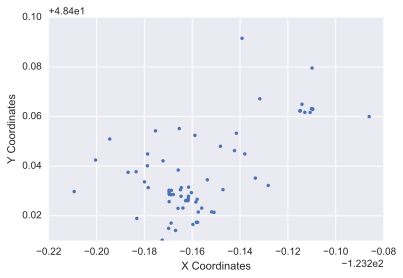

In [33]:
ax = plt.figure(figsize=(6, 4)).gca()
#ax.plot(events.space[:, 0], events.space[:, 1], ".")

ax.plot(np.array(theft['longitude']), np.array(theft['latitude']), ".")


ax.set_xlabel("X Coordinates")
ax.set_ylabel("Y Coordinates")
plt.show()